In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from numpy import trapz
import os
import glob

### Comparing ASM, LGB, RF and PingUMIL in a Train-Test Split Scenario

           asm_sg3f  lgb_sg3f  lgb_sg3f_csf   lr_sg3f   rf_sg3f  rf2_sg3f  \
timestamp                                                                   
25.0       0.492540  0.533402      0.469899  0.561892  0.604365  0.588765   
30.0       0.527004  0.603911      0.607672  0.567389  0.640067  0.633673   
35.0       0.527626  0.566339      0.597102  0.536427  0.639216  0.612384   
40.0       0.511939  0.603471      0.600586  0.495670  0.632029  0.597838   
45.0       0.505535  0.597093      0.592331  0.516848  0.635577  0.643435   
...             ...       ...           ...       ...       ...       ...   
595.0      0.507216  0.528278      0.548985  0.442994  0.527063  0.536590   
600.0      0.507412  0.540598      0.538468  0.442833  0.518564  0.527427   
605.0      0.507607  0.533140      0.547074  0.443292  0.529020  0.536781   
610.0      0.507802  0.538324      0.541317  0.443132  0.541024  0.522691   
615.0      0.507995  0.532681      0.542610  0.442972  0.536633  0.531512   

<AxesSubplot:xlabel='timestamp'>

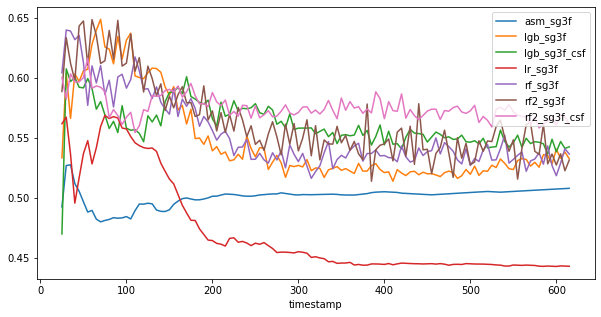

In [3]:
result_dict = {}
input_files = ["asm_sg3f.csv", "lgb_sg3f.csv", "lgb_sg3f_csf.csv", "lr_sg3f.csv", "lr_sg3f_csf.csv", "rf_sg3f.csv", "rf_sg3f_csf.csv", "rf2_sg3f.csv", "rf2_sg3f_csf.csv"]
for input_file in input_files:
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    model_name = input_file.split(".")[0]
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
    result_df = pd.DataFrame.from_dict(result_dict)
print(result_df)
result_df.plot.line(figsize=(10,5))

In [4]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_10foldval"
files = glob.glob(exp_log_path+"/*/*.txt", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    folder = os.path.dirname(file)
    if not os.path.exists(file) or not os.path.exists(f"{folder}/results.csv"):
        continue
    with open(file) as fp:
        for line in fp:
            if "f1_avg" in line:
                exp_dict["f1_test"].append(float(line.split(" ")[-1]))
                break
    timestamp_df = pd.read_csv(f"{folder}/results.csv")
    exp_dict["timestamp"].append(timestamp_df["timestamp"].values[0])
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours"}).set_index("timestamp")
final_df = result_df.merge(exp_df, on="timestamp")
print(result_df)
print(exp_df)


120


           asm_sg3f  lgb_sg3f  lgb_sg3f_csf   lr_sg3f   rf_sg3f  rf2_sg3f  \
timestamp                                                                   
25.0       0.492540  0.533402      0.469899  0.561892  0.604365  0.588765   
30.0       0.527004  0.603911      0.607672  0.567389  0.640067  0.633673   
35.0       0.527626  0.566339      0.597102  0.536427  0.639216  0.612384   
40.0       0.511939  0.603471      0.600586  0.495670  0.632029  0.597838   
45.0       0.505535  0.597093      0.592331  0.516848  0.635577  0.643435   
...             ...       ...           ...       ...       ...       ...   
595.0      0.507216  0.528278      0.548985  0.442994  0.527063  0.536590   
600.0      0.507412  0.540598      0.538468  0.442833  0.518564  0.527427   
605.0      0.507607  0.533140      0.547074  0.443292  0.529020  0.536781   
610.0      0.507802  0.538324      0.541317  0.443132  0.541024  0.522691   
615.0      0.507995  0.532681      0.542610  0.442972  0.536633  0.531512   

<AxesSubplot:xlabel='timestamp'>

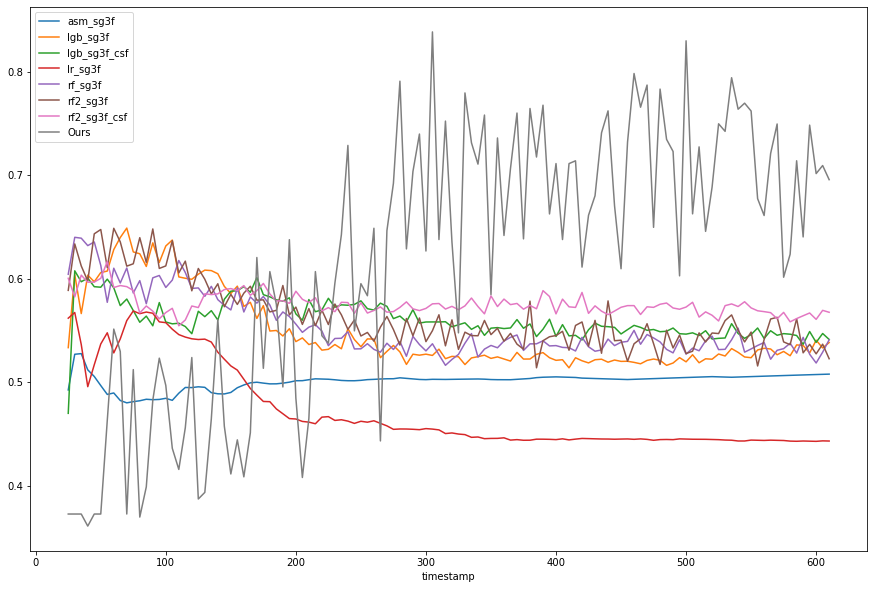

In [5]:
final_df.plot.line(figsize=(15,10))

### Comparing methods in a 10-fold cv scenario
Data is partitioned in
8 - train
1 - validation
1 - test

In [6]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_10foldval_811"
files = glob.glob(exp_log_path+"/*/*.txt", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    folder = os.path.dirname(file)
    with open(file) as fp:
        for line in fp:
            if "f1" in line:
                exp_dict["f1_test"].append(float(line.split(" ")[-1]))
            if "timestamp" in line:
                exp_dict["timestamp"].append(int(line.split(" ")[-1]))
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours_811"}).set_index("timestamp")
final_df = final_df.merge(exp_df, on="timestamp")
print(result_df)
print(exp_df)


82
           asm_sg3f  lgb_sg3f  lgb_sg3f_csf   lr_sg3f   rf_sg3f  rf2_sg3f  \
timestamp                                                                   
25.0       0.492540  0.533402      0.469899  0.561892  0.604365  0.588765   
30.0       0.527004  0.603911      0.607672  0.567389  0.640067  0.633673   
35.0       0.527626  0.566339      0.597102  0.536427  0.639216  0.612384   
40.0       0.511939  0.603471      0.600586  0.495670  0.632029  0.597838   
45.0       0.505535  0.597093      0.592331  0.516848  0.635577  0.643435   
...             ...       ...           ...       ...       ...       ...   
595.0      0.507216  0.528278      0.548985  0.442994  0.527063  0.536590   
600.0      0.507412  0.540598      0.538468  0.442833  0.518564  0.527427   
605.0      0.507607  0.533140      0.547074  0.443292  0.529020  0.536781   
610.0      0.507802  0.538324      0.541317  0.443132  0.541024  0.522691   
615.0      0.507995  0.532681      0.542610  0.442972  0.536633  0.531512

<AxesSubplot:xlabel='timestamp'>

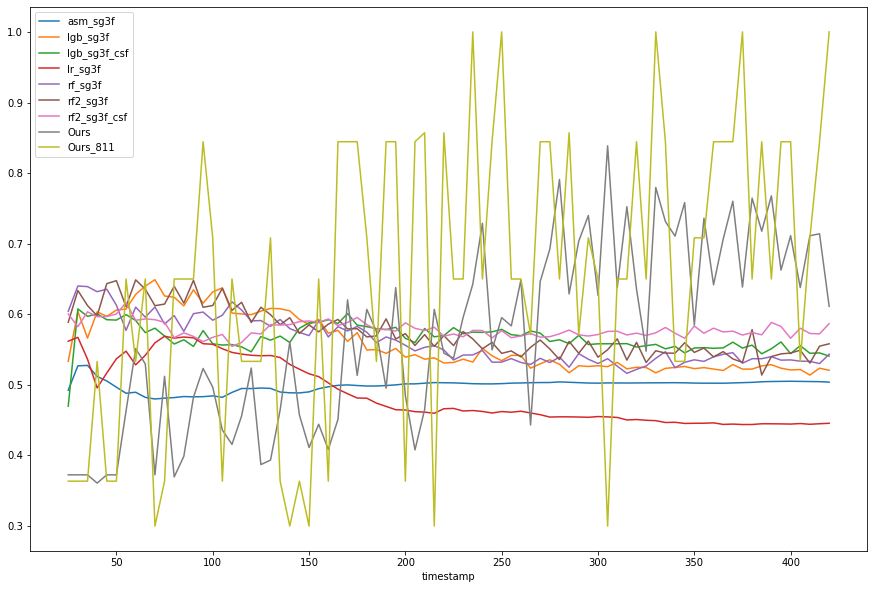

In [7]:
final_df.plot.line(figsize=(15,10))

## 10 fold experiment

asm_sg3f_10fold_test 29.99064153439154
lr_sg3f_csf_10fold_test 16.964587112622826
rf_sg3f_csf_10fold_test 29.950727513227513
rf_sg3f_csf_10fold_test 31.114471200096197
           asm_sg3f_10fold_test  lr_sg3f_csf_10fold_test  \
timestamp                                                  
25.0                   0.660437                 0.448485   
30.0                   0.657976                 0.621010   
35.0                   0.760357                 0.640278   
40.0                   0.795595                 0.611111   
45.0                   0.838135                 0.532222   
50.0                   0.848849                 0.580556   
55.0                   0.857183                 0.654882   
60.0                   0.783929                 0.456250   
65.0                   0.853690                 0.567698   
70.0                   0.836190                 0.604861   
75.0                   0.779683                 0.581009   
80.0                   0.789087                 0.50

<AxesSubplot:xlabel='timestamp'>

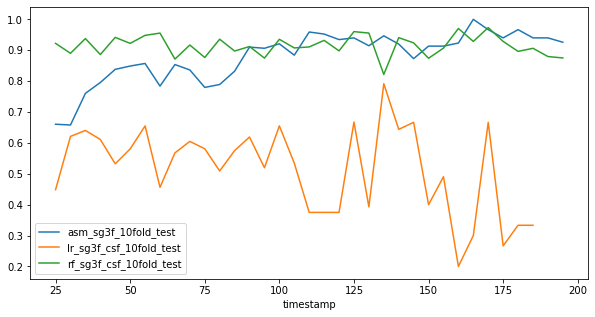

In [8]:
result_dict = {}
'''
input_files = ["asm_sg3f_10fold_test.csv",
               "lgb_sg3f_10fold_test.csv",
               "lgb_sg3f_csf_10fold_test.csv",
               "lr_sg3f_10fold_test.csv",
               "lr_sg3f_csf_10fold_test.csv",
               "rf_sg3f_10fold_test.csv",
               "rf_sg3f_csf_10fold_test.csv"]'''
input_files = ["asm_sg3f_10fold_test.csv",
               "lr_sg3f_csf_10fold_test.csv",
               "rf_sg3f_csf_10fold_test.csv"]
for input_file in input_files:
    area = 0
    exp_df = pd.read_csv(input_file, index_col=0)
    model_name = input_file.split(".")[0]
    for i, param in enumerate(exp_df.parameters.unique()):
        param_df = exp_df[exp_df.parameters==param].groupby("timestamp").mean()
        curve_area = trapz(param_df["f1_test"], dx=1)
        if curve_area > area:
            area = curve_area
            result_dict[model_name] = param_df["f1_test"]
            print(model_name, curve_area)
    result_df = pd.DataFrame.from_dict(result_dict)
print(result_df)
result_df.plot.line(figsize=(10,5))

In [18]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_t8v1t1_valonf1"
files = glob.glob(exp_log_path+"/*/*.csv", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    df = pd.read_csv(file)
    exp_dict["f1_test"].append(df['f1_test'].mean())
    exp_dict["timestamp"].append(df['timestamp'][0])
print(exp_dict)
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours_811"}).set_index("timestamp")
print(exp_df)
final_df = result_df.merge(exp_df, on="timestamp", how="right")


119
{'timestamp': [570, 65, 255, 500, 415, 60, 105, 460, 535, 260, 90, 140, 70, 80, 495, 355, 515, 310, 575, 275, 150, 340, 445, 335, 285, 130, 560, 265, 430, 75, 610, 225, 50, 120, 475, 605, 145, 190, 100, 380, 35, 305, 405, 530, 470, 295, 540, 520, 45, 85, 325, 230, 175, 125, 505, 400, 220, 550, 395, 585, 200, 555, 365, 320, 245, 545, 185, 465, 480, 280, 195, 30, 155, 240, 350, 250, 345, 385, 110, 510, 425, 590, 580, 360, 20, 525, 440, 600, 565, 40, 490, 180, 390, 300, 315, 485, 290, 205, 55, 450, 95, 410, 115, 435, 420, 160, 165, 25, 135, 595, 235, 215, 210, 270, 370, 330, 455, 375, 170], 'f1_test': [0.8008333333333335, 0.37257575757575756, 0.6941666666666666, 0.7593253968253968, 0.7562878787878788, 0.37257575757575756, 0.5162878787878789, 0.7632142857142857, 0.7114862914862916, 0.8507142857142858, 0.682950937950938, 0.6035606060606061, 0.4590151515151515, 0.5403282828282829, 0.7969444444444446, 0.8416666666666668, 0.8046428571428572, 0.7854545454545455, 0.8532539682539685, 0.793055

<Figure size 432x288 with 0 Axes>

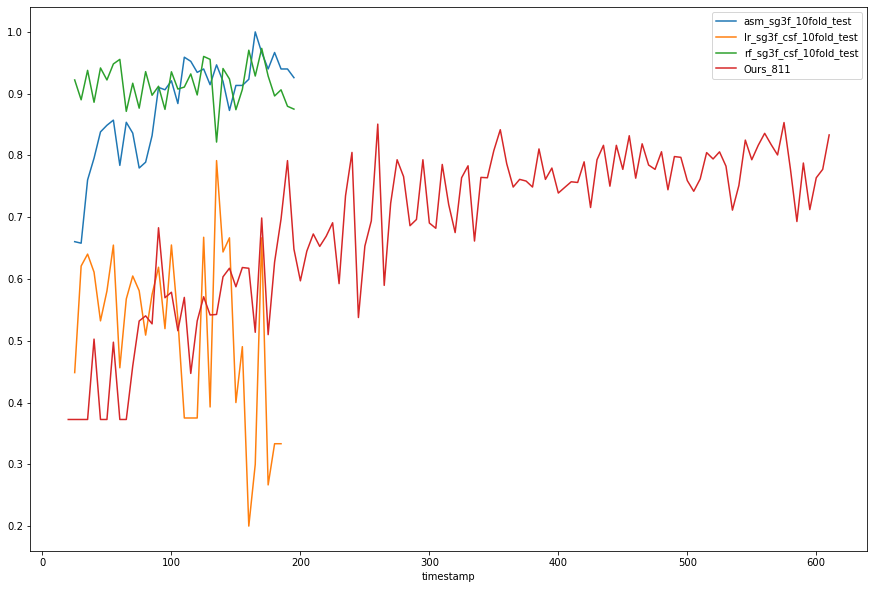

In [19]:
plt.figure()
plot_fig = final_df.plot.line(figsize=(15,10)).get_figure()
plot_fig.savefig("10fold_valonf1.png", bbox_inches='tight')


In [20]:
exp_log_path = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/winpred_winpred_binary_activity_gs_macro_high_cls_epochs_allts_t8v1t1_valonf1"
files = glob.glob(exp_log_path+"/*/*.csv", recursive=True)
exp_dict = {"timestamp" : [], "f1_test" : []}
print(len(files))
for file in files:
    df = pd.read_csv(file)
    exp_dict["f1_test"].append(df['f1_test'].mean())
    exp_dict["timestamp"].append(df['timestamp'][0])
print(exp_dict)
exp_df = pd.DataFrame.from_dict(exp_dict).sort_values(by="timestamp").rename(columns={"f1_test" : "Ours_allts_811"}).set_index("timestamp")
print(exp_df)
final2_df = final_df.merge(exp_df, on="timestamp", how="right")


119
{'timestamp': [470, 275, 240, 165, 340, 450, 110, 155, 385, 525, 215, 70, 405, 420, 475, 355, 125, 515, 175, 85, 390, 220, 445, 305, 605, 490, 205, 520, 580, 600, 430, 345, 550, 590, 285, 75, 230, 150, 400, 370, 585, 250, 310, 365, 510, 350, 610, 380, 50, 360, 25, 115, 30, 170, 535, 255, 440, 330, 120, 160, 295, 555, 320, 415, 20, 570, 425, 375, 500, 595, 565, 80, 260, 485, 65, 290, 40, 315, 140, 100, 145, 560, 225, 435, 530, 245, 35, 280, 495, 55, 235, 195, 395, 180, 300, 45, 455, 190, 540, 545, 465, 270, 90, 185, 460, 480, 265, 335, 505, 210, 135, 60, 130, 575, 325, 105, 200, 95, 410], 'f1_test': [0.6951767676767677, 0.7300974025974027, 0.7250000000000002, 0.5182323232323233, 0.6465656565656566, 0.7068434343434344, 0.5613636363636363, 0.5535353535353535, 0.7280555555555555, 0.7455555555555555, 0.6212878787878788, 0.611919191919192, 0.7446212121212122, 0.7217243867243869, 0.7165656565656565, 0.7757323232323232, 0.5120454545454545, 0.7126767676767678, 0.5959595959595959, 0.53603535

In [39]:
ax = final2_df.plot(title="All models")
fig = ax.get_figure()
fig.savefig("10fold_valonf1_allts.png")


<IPython.core.display.Javascript object>

In [40]:
ax = final2_df[["Ours_811","Ours_allts_811"]].plot(title="Data")
fig = ax.get_figure()
fig.savefig("compare_ours.png")

<IPython.core.display.Javascript object>